# Visualising the results of all the models

In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [91]:
def load_results(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [93]:
def extract_metrics(files_dict):
    data = []
    for difficulty, models in files_dict.items():
        for model, file_path in models.items():
            with open(file_path, 'r') as f:
                metrics = json.load(f)
                data.append({
                    "Difficulty": difficulty,
                    "Model": model,
                    "Precision": metrics.get("mean_precision", None),
                    "Recall": metrics.get("mean_recall", None),
                    "F1Score": metrics.get("mean_f1_score", None)
                })
    return pd.DataFrame(data)

## Number of Faces

In [92]:
files_number_of_faces = {
    "Easy": {
        "MTCNN": "Outputs MTCNN/metrics_easy_num_faces_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_easy_num_faces_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_easy_num_faces.json",
        "YOLOv5": "Outputs YOLOv5/metrics_easy_num_faces.json"
    },
    "Medium": {
        "MTCNN": "Outputs MTCNN/metrics_medium_num_faces_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_medium_num_faces_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_medium_num_faces.json",
        "YOLOv5": "Outputs YOLOv5/metrics_medium_num_faces.json"        
    },
    "Hard": {
        "MTCNN": "Outputs MTCNN/metrics_hard_num_faces_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_hard_num_faces_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_hard_num_faces.json",
        "YOLOv5": "Outputs YOLOv5/metrics_hard_num_faces.json"        
    }
}

In [94]:
metrics_number_of_faces = extract_metrics(files_number_of_faces)
metrics_number_of_faces

,Difficulty,Model,Precision,Recall,F1Score
0,Easy,MTCNN,0.764780,0.814617,0.780660
1,Easy,OpenCV,0.701872,0.708556,0.704100
2,Easy,RetinaFace,0.928402,0.944742,0.933422
3,Easy,YOLOv5,0.910625,0.952763,0.923457
4,Medium,MTCNN,0.838753,0.712244,0.744752
5,Medium,OpenCV,0.623217,0.451760,0.500173
6,Medium,RetinaFace,0.971418,0.888736,0.913889
7,Medium,YOLOv5,0.910407,0.855770,0.864176
8,Hard,MTCNN,0.895386,0.497175,0.591546
9,Hard,OpenCV,0.342085,0.081356,0.115398


In [95]:
metrics_number_of_faces.to_json("num_faces.json", orient="split")

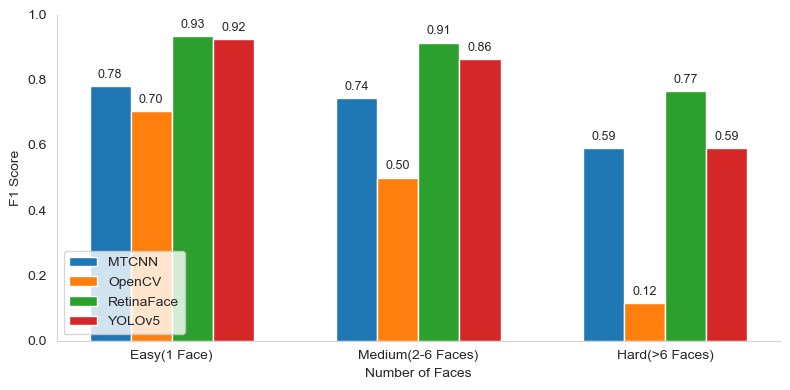

In [122]:
difficulty_levels = ["Easy(1 Face)", "Medium(2-6 Faces)", "Hard(>6 Faces)"]
models = metrics_number_of_faces["Model"].unique()
bar_width = 0.05
group_spacing = 0.1
x_positions = np.arange(len(difficulty_levels)) * (len(models) * bar_width + group_spacing)

fig, ax = plt.subplots(figsize=(8, 4))

for i, model in enumerate(models):
    model_data = metrics_number_of_faces[metrics_number_of_faces["Model"] == model]
    f1_scores = model_data["F1Score"].values
    ax.bar(
        x_positions + i * bar_width,
        f1_scores,
        width=bar_width,
        label=model
    )

ax.set_xticks(x_positions + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(difficulty_levels)
ax.set_xlabel("Number of Faces")
ax.set_ylabel("F1 Score")
#ax.set_title("F1 Scores for the Number of Faces")
ax.set_ylim(0, 1)
ax.legend(loc="lower left")

#ax.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=9
        )
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
sns.despine()
plt.tight_layout()
plt.show()

## Blur

In [97]:
files_blur = {
    "Easy": {
        "MTCNN": "Outputs MTCNN/metrics_easy_blur_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_easy_blur_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_easy_blur.json",
        "YOLOv5": "Outputs YOLOv5/metrics_easy_blur.json"
    },
    "Medium": {
        "MTCNN": "Outputs MTCNN/metrics_medium_blur_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_medium_blur_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_medium_blur.json",
        "YOLOv5": "Outputs YOLOv5/metrics_medium_blur.json"        
    },
    "Hard": {
        "MTCNN": "Outputs MTCNN/metrics_hard_blur_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_hard_blur_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_hard_blur.json",
        "YOLOv5": "Outputs YOLOv5/metrics_hard_blur.json"        
    }
}

In [98]:
metrics_blur = extract_metrics(files_blur)
metrics_blur.to_json("blur.json", orient="split")
metrics_blur

,Difficulty,Model,Precision,Recall,F1Score
0,Easy,MTCNN,0.864551,0.890010,0.865877
1,Easy,OpenCV,0.843881,0.798826,0.809910
2,Easy,RetinaFace,0.958810,0.969687,0.960272
3,Easy,YOLOv5,0.949721,0.979876,0.957915
4,Medium,MTCNN,0.822899,0.755397,0.771808
5,Medium,OpenCV,0.499583,0.325244,0.369900
6,Medium,RetinaFace,0.959995,0.929080,0.938175
7,Medium,YOLOv5,0.919547,0.904323,0.898763
8,Hard,MTCNN,0.811063,0.407789,0.504296
9,Hard,OpenCV,0.277917,0.064219,0.093287


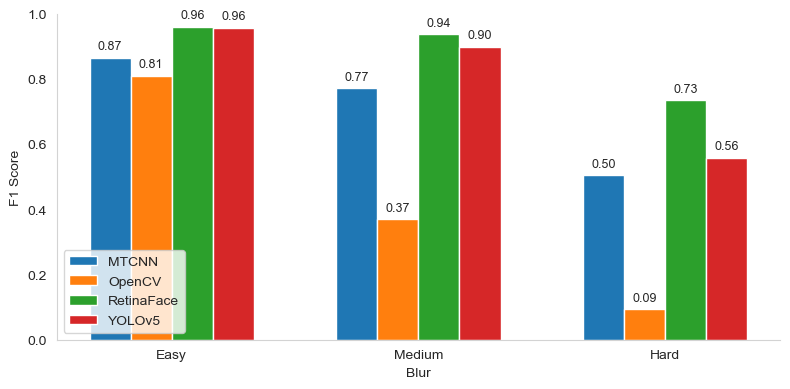

In [125]:
difficulty_levels = ["Easy", "Medium", "Hard"]
models = metrics_blur["Model"].unique()
bar_width = 0.05
group_spacing = 0.1
x_positions = np.arange(len(difficulty_levels)) * (len(models) * bar_width + group_spacing)

fig, ax = plt.subplots(figsize=(8, 4))

for i, model in enumerate(models):
    model_data = metrics_blur[metrics_blur["Model"] == model]
    f1_scores = model_data["F1Score"].values
    ax.bar(
        x_positions + i * bar_width,
        f1_scores,
        width=bar_width,
        label=model
    )

ax.set_xticks(x_positions + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(difficulty_levels)
ax.set_xlabel("Blur")
ax.set_ylabel("F1 Score")
#ax.set_title("F1 Scores for Blur")
ax.set_ylim(0, 1)
ax.legend(loc="lower left")

#ax.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=9
        )
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
sns.despine()
plt.tight_layout()
plt.show()

## Occlusion

In [107]:
files_occlusion = {
    "Easy": {
        "MTCNN": "Outputs MTCNN/metrics_easy_occlusion_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_easy_occlusion_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_easy_occlusion.json",
        "YOLOv5": "Outputs YOLOv5/metrics_easy_occlusion.json"
    },
    "Medium": {
        "MTCNN": "Outputs MTCNN/metrics_medium_occlusion_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_medium_occlusion_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_medium_occlusion.json",
        "YOLOv5": "Outputs YOLOv5/metrics_medium_occlusion.json"        
    },
    "Hard": {
        "MTCNN": "Outputs MTCNN/metrics_hard_occlusion_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_hard_occlusion_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_hard_occlusion.json",
        "YOLOv5": "Outputs YOLOv5/metrics_hard_occlusion.json"        
    }
}

In [108]:
metrics_occlusion = extract_metrics(files_occlusion)
metrics_occlusion.to_json("occlusion.json", orient="split")
metrics_occlusion

,Difficulty,Model,Precision,Recall,F1Score
0,Easy,MTCNN,0.874971,0.859978,0.853649
1,Easy,OpenCV,0.688333,0.624825,0.642603
2,Easy,RetinaFace,0.971228,0.965660,0.964739
3,Easy,YOLOv5,0.939592,0.937424,0.924885
4,Medium,MTCNN,0.757419,0.602500,0.640137
5,Medium,OpenCV,0.435278,0.247345,0.286998
6,Medium,RetinaFace,0.940971,0.843187,0.874941
7,Medium,YOLOv5,0.880446,0.787255,0.807495
8,Hard,MTCNN,0.814508,0.412639,0.509845
9,Hard,OpenCV,0.364889,0.105801,0.143406


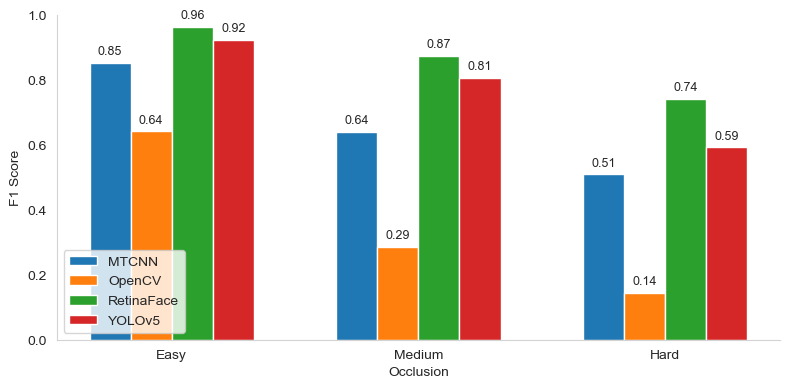

In [126]:
difficulty_levels = ["Easy", "Medium", "Hard"]
models = metrics_occlusion["Model"].unique()
bar_width = 0.05
group_spacing = 0.1
x_positions = np.arange(len(difficulty_levels)) * (len(models) * bar_width + group_spacing)

fig, ax = plt.subplots(figsize=(8, 4))

for i, model in enumerate(models):
    model_data = metrics_occlusion[metrics_occlusion["Model"] == model]
    f1_scores = model_data["F1Score"].values
    ax.bar(
        x_positions + i * bar_width,
        f1_scores,
        width=bar_width,
        label=model
    )

ax.set_xticks(x_positions + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(difficulty_levels)
ax.set_xlabel("Occlusion")
ax.set_ylabel("F1 Score")
#ax.set_title("F1 Scores for Occlusion")
ax.set_ylim(0, 1)
ax.legend(loc="lower left")

#ax.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=9
        )
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
sns.despine()
plt.tight_layout()
plt.show()

## Illumination

In [115]:
files_illumination = {
    "Normal": {
        "MTCNN": "Outputs MTCNN/metrics_normal_illumination_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_normal_illumination_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_normal_illumination.json",
        "YOLOv5": "Outputs YOLOv5/metrics_normal_illumination.json"
    },
    "Extreme": {
        "MTCNN": "Outputs MTCNN/metrics_extreme_illumination_mtcnn.json",
        "OpenCV": "Outputs OpenCV/metrics_extreme_illumination_opencv.json",
        "RetinaFace": "Outputs RetinaFace/metrics_extreme_illumination.json",
        "YOLOv5": "Outputs YOLOv5/metrics_extreme_illumination.json"       
    }
}

In [116]:
metrics_illumination = extract_metrics(files_illumination)
metrics_illumination.to_json("illumination.json", orient="split")
metrics_illumination

,Difficulty,Model,Precision,Recall,F1Score
0,Normal,MTCNN,0.844500,0.723126,0.746224
1,Normal,OpenCV,0.632500,0.504322,0.526848
2,Normal,RetinaFace,0.950812,0.848907,0.877102
3,Normal,YOLOv5,0.918624,0.824951,0.834297
4,Extreme,MTCNN,0.837440,0.552564,0.614003
5,Extreme,OpenCV,0.420833,0.235492,0.263382
6,Extreme,RetinaFace,0.963426,0.731419,0.797600
7,Extreme,YOLOv5,0.883839,0.624812,0.673221


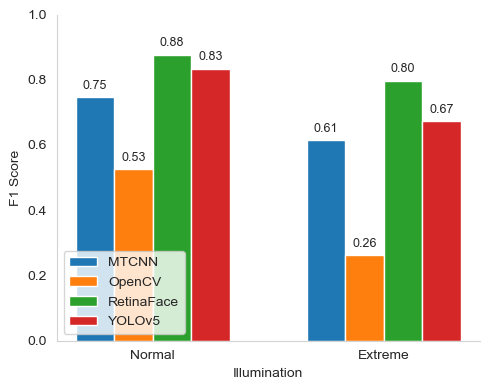

In [127]:
difficulty_levels = ["Normal", "Extreme"]
models = metrics_illumination["Model"].unique()
bar_width = 0.05
group_spacing = 0.1
x_positions = np.arange(len(difficulty_levels)) * (len(models) * bar_width + group_spacing)

fig, ax = plt.subplots(figsize=(5, 4))

for i, model in enumerate(models):
    model_data = metrics_illumination[metrics_illumination["Model"] == model]
    f1_scores = model_data["F1Score"].values
    ax.bar(
        x_positions + i * bar_width,
        f1_scores,
        width=bar_width,
        label=model
    )

ax.set_xticks(x_positions + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(difficulty_levels)
ax.set_xlabel("Illumination")
ax.set_ylabel("F1 Score")
#ax.set_title("F1 Scores for Illumination")
ax.set_ylim(0, 1)
ax.legend(loc="lower left")

#ax.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=9
        )
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
sns.despine()
plt.tight_layout()
plt.show()